In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arjuntejaswi_plant_village_path = kagglehub.dataset_download('arjuntejaswi/plant-village')

print('Data source import complete.')


100%|██████████| 329M/329M [00:16<00:00, 21.2MB/s]

Extracting files...


Data source import complete.


In [6]:
# 1. Install required libraries
!pip install kagglehub

# 2. Mount Google Drive so you can save data persistently
from google.colab import drive
drive.mount('/content/drive')

# 3. (Optional) Change working directory to somewhere in Drive
import os
drive_path = '/content/drive/MyDrive/PlantVillageData'  # change this folder as needed
os.makedirs(drive_path, exist_ok=True)
os.chdir(drive_path)

# 4. Import kagglehub and authenticate if needed
import kagglehub

# If your dataset is public this might work without extra authentication.
# But if credentials are needed you can either:
#   a) Use kagglehub.login()
#   b) Set environment variables KAGGLE_USERNAME and KAGGLE_KEY
#   c) Place a kaggle.json in ~/.kaggle/
#
# Example:
# kagglehub.login()

# 5. Download the dataset
arjuntejaswi_plant_village_path = kagglehub.dataset_download('arjuntejaswi/plant-village')
print('Dataset downloaded to:', arjuntejaswi_plant_village_path)

# 6. If the dataset is zipped (or compressed), unzip it
# Suppose the dataset download gives a zip file, named "plant-village.zip"
import zipfile

zip_filename = os.path.basename(arjuntejaswi_plant_village_path)
if zip_filename.endswith('.zip'):
    print("Unzipping ...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall('.')  # extract in current folder
    print("Extraction complete.")

print("Data saved in:", os.getcwd())


Mounted at /content/drive
Using Colab cache for faster access to the 'plant-village' dataset.
Dataset downloaded to: /kaggle/input/plant-village
Data saved in: /content/drive/MyDrive/PlantVillageData


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, Sequential, losses


In [9]:
import zipfile
import os

# Path to the zip file
zip_path = "/content/drive/MyDrive/PlantVillage/PlantVillage.zip"

# Destination folder to extract
extract_path = "/content/drive/MyDrive/PlantVillageData/PlantVillage"
os.makedirs(extract_path, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped to:", extract_path)


✅ Dataset unzipped to: /content/drive/MyDrive/PlantVillageData/PlantVillage


In [14]:
import os
import shutil
import random

# Source and destination directories
SOURCE_DIR = "/content/drive/MyDrive/PlantVillageData/PlantVillage/PlantVillage"
DEST_DIR = "/content/drive/MyDrive/PlantVillageData/filtered_dataset"

# Classes to keep (matching your folder structure)
CLASSES = {
    "potato": [
        "Potato___Early_blight",
        "Potato___Late_blight",
        "Potato___healthy"
    ],
    "pepper": [
        "Pepper__bell___Bacterial_spot",
        "Pepper__bell___healthy"
    ],
    "tomato": [
        "Tomato_Bacterial_spot",
        "Tomato_Early_blight",
        "Tomato_Late_blight",
        "Tomato_healthy"
    ]
}

# Train/Val/Test split ratios
SPLITS = {"train": 0.7, "val": 0.2, "test": 0.1}

def split_and_copy(src, dest, splits):
    """Shuffle, split, and copy files from src to subfolders of dest (‘train’, ‘val’, ‘test’)."""
    files = [f for f in os.listdir(src) if os.path.isfile(os.path.join(src, f))]
    random.shuffle(files)

    n_total = len(files)
    n_train = int(splits["train"] * n_total)
    n_val = int(splits["val"] * n_total)

    split_files = {
        "train": files[:n_train],
        "val": files[n_train:n_train+n_val],
        "test": files[n_train+n_val:]
    }

    for split, split_list in split_files.items():
        split_dest = os.path.join(dest, split)
        os.makedirs(split_dest, exist_ok=True)
        for f in split_list:
            shutil.copy(os.path.join(src, f), os.path.join(split_dest, f))

# Main loop
for plant, class_list in CLASSES.items():
    for cls in class_list:
        src_path = os.path.join(SOURCE_DIR, cls)
        dest_path = os.path.join(DEST_DIR, plant, cls)

        if os.path.exists(src_path):
            print(f"Processing {cls} → {dest_path}")
            split_and_copy(src_path, dest_path, SPLITS)
        else:
            print(f"⚠️ {cls} not found in source dataset! Path: {src_path}")

print("\n✅ Filtered dataset ready in:", DEST_DIR)


Processing Potato___Early_blight → /content/drive/MyDrive/PlantVillageData/filtered_dataset/potato/Potato___Early_blight
Processing Potato___Late_blight → /content/drive/MyDrive/PlantVillageData/filtered_dataset/potato/Potato___Late_blight
Processing Potato___healthy → /content/drive/MyDrive/PlantVillageData/filtered_dataset/potato/Potato___healthy
Processing Pepper__bell___Bacterial_spot → /content/drive/MyDrive/PlantVillageData/filtered_dataset/pepper/Pepper__bell___Bacterial_spot
Processing Pepper__bell___healthy → /content/drive/MyDrive/PlantVillageData/filtered_dataset/pepper/Pepper__bell___healthy
Processing Tomato_Bacterial_spot → /content/drive/MyDrive/PlantVillageData/filtered_dataset/tomato/Tomato_Bacterial_spot
Processing Tomato_Early_blight → /content/drive/MyDrive/PlantVillageData/filtered_dataset/tomato/Tomato_Early_blight
Processing Tomato_Late_blight → /content/drive/MyDrive/PlantVillageData/filtered_dataset/tomato/Tomato_Late_blight
Processing Tomato_healthy → /content

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - accuracy: 0.4994 - loss: 1.0446 - val_accuracy: 0.7372 - val_loss: 0.5551
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 352ms/step - accuracy: 0.7870 - loss: 0.5195 - val_accuracy: 0.8233 - val_loss: 0.3695
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 312ms/step - accuracy: 0.8656 - loss: 0.3422 - val_accuracy: 0.8698 - val_loss: 0.2854
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.8905 - loss: 0.2551 - val_accuracy: 0.9047 - val_loss: 0.1969
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.9182 - loss: 0.2134 - val_accuracy: 0.9093 - val_loss: 0.2065
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 318ms/step - accuracy: 0.9191 - loss: 0.2176 - val_accuracy: 0.9302 - val_loss: 0.1694
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - accuracy: 0.9252 - loss: 0.1990 - val_accuracy: 0.8744 - val_loss: 0.2853
Epoch 8/20
54/

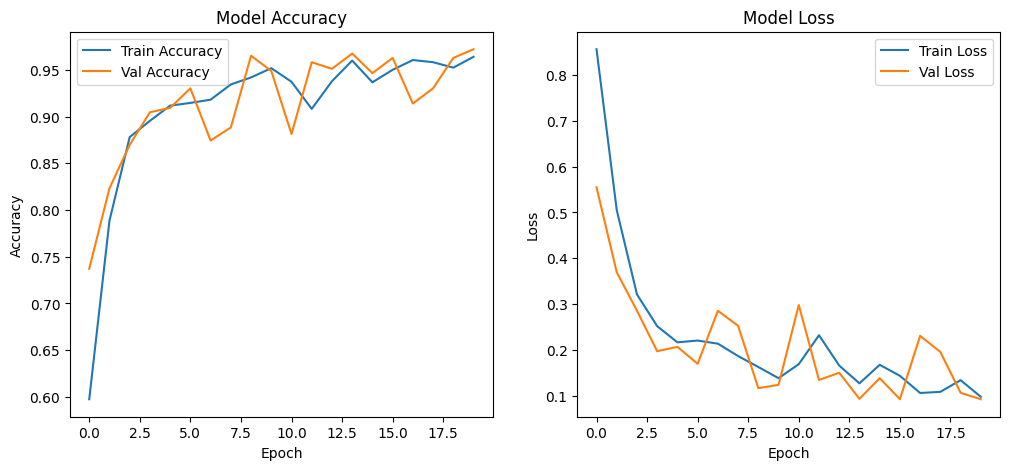

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step


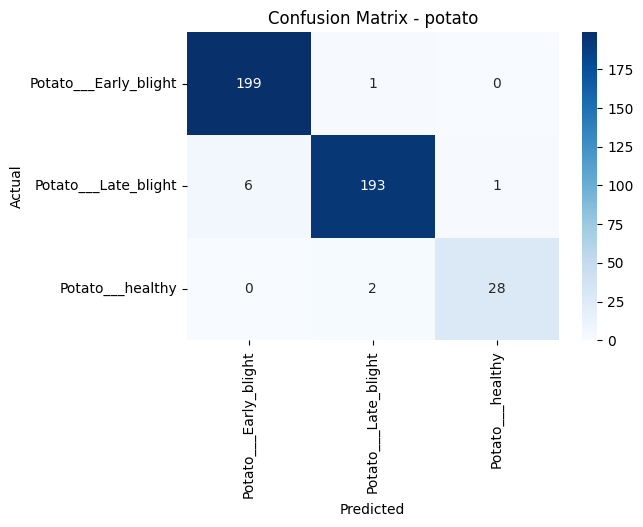

                       precision    recall  f1-score   support

Potato___Early_blight       0.97      0.99      0.98       200
 Potato___Late_blight       0.98      0.96      0.97       200
     Potato___healthy       0.97      0.93      0.95        30

             accuracy                           0.98       430
            macro avg       0.97      0.96      0.97       430
         weighted avg       0.98      0.98      0.98       430




✅ Model saved: /content/drive/MyDrive/PlantVillageData/models/potato_cnn.h5

Found 1981 images belonging to 2 classes.
Found 494 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 392ms/step - accuracy: 0.6591 - loss: 0.6706 - val_accuracy: 0.8279 - val_loss: 0.3875
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.8486 - loss: 0.3754 - val_accuracy: 0.8644 - val_loss: 0.3810
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.8842 - loss: 0.3194 - val_accuracy: 0.9231 - val_loss: 0.2163
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.8996 - loss: 0.3008 - val_accuracy: 0.9514 - val_loss: 0.1683
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.9380 - loss: 0.1926 - val_accuracy: 0.9332 - val_loss: 0.2106
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - accuracy: 0.9461 - loss: 0.1592 - val_accuracy: 0.9393 - val_loss: 0.1916
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 344ms/step - accuracy: 0.9343 - loss: 0.2029 - val_accuracy: 0.9393 - val_loss: 0.1725
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9553 - loss: 0.1229 - val_accu

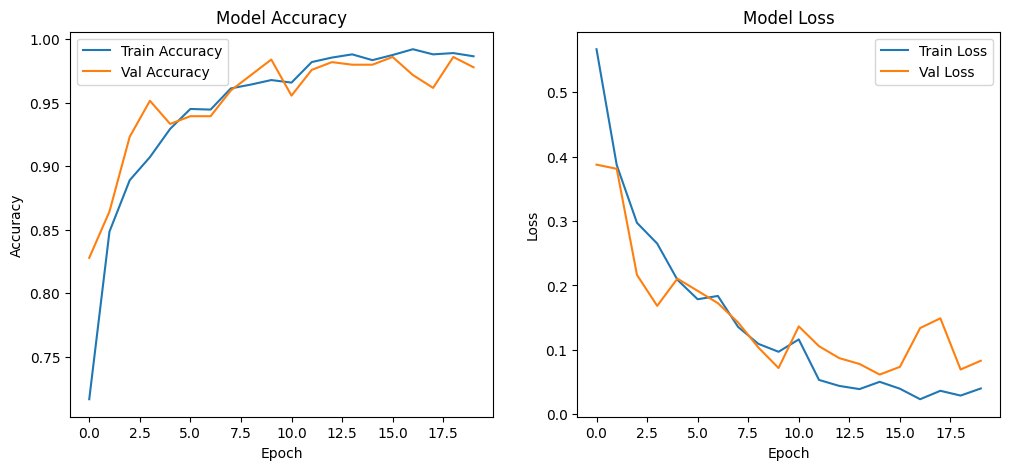

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step


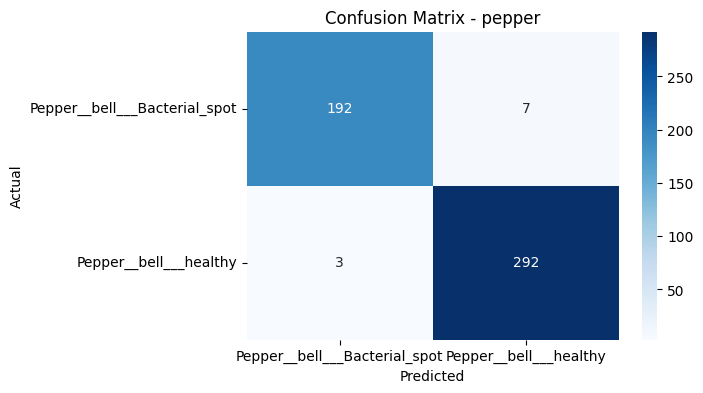

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.98      0.96      0.97       199
       Pepper__bell___healthy       0.98      0.99      0.98       295

                     accuracy                           0.98       494
                    macro avg       0.98      0.98      0.98       494
                 weighted avg       0.98      0.98      0.98       494


✅ Model saved: /content/drive/MyDrive/PlantVillageData/models/pepper_cnn.h5

Found 7785 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 88s 343ms/step - accuracy: 0.5504 - loss: 1.0538 - val_accuracy: 0.8219 - val_loss: 0.4320
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 133s 319ms/step - accuracy: 0.8093 - loss: 0.4857 - val_accuracy: 0.8513 - val_loss: 0.3857
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 79s 323ms/step - accuracy: 0.8441 - loss: 0.3912 - val_accuracy: 0.8616 - val_loss: 0.3420
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 85s 349ms/step - accuracy: 0.8701 - loss: 0.3288 - val_accuracy: 0.8883 - val_loss: 0.3175
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 135s 322ms/step - accuracy: 0.8724 - loss: 0.3264 - val_accuracy: 0.8549 - val_loss: 0.3673
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 81s 331ms/step - accuracy: 0.8734 - loss: 0.3184 - val_accuracy: 0.9192 - val_loss: 0.2258
Epoch 7/20
195/244 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.9017 - loss: 0.2550

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# ---------------------------
# Helper function: Train and evaluate a CNN
# ---------------------------
def train_cnn_model(dataset_dir, img_size=(128,128), batch_size=32, epochs=20):
    # Data augmentation + rescaling
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_gen = datagen.flow_from_directory(
        dataset_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_gen = datagen.flow_from_directory(
        dataset_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    # ---------------------------
    # CNN Architecture
    # ---------------------------
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(*img_size, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(train_gen.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)

    # ---------------------------
    # Plot Training Curves
    # ---------------------------
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    # ---------------------------
    # Confusion Matrix
    # ---------------------------
    y_true = val_gen.classes
    y_pred = np.argmax(model.predict(val_gen), axis=1)

    cm = confusion_matrix(y_true, y_pred)
    class_labels = list(train_gen.class_indices.keys())

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix - {os.path.basename(dataset_dir)}")
    plt.show()

    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Save model
    model_path = os.path.join('/content/drive/MyDrive/PlantVillageData/models', f"{os.path.basename(dataset_dir)}_cnn.h5")
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    model.save(model_path)
    print(f"\n✅ Model saved: {model_path}\n")

    return model

# ---------------------------
# Train three models
# ---------------------------
potato_model = train_cnn_model("/content/drive/MyDrive/PlantVillageData/filtered_dataset/potato", epochs=20)
pepper_model = train_cnn_model("/content/drive/MyDrive/PlantVillageData/filtered_dataset/pepper", epochs=20)
tomato_model = train_cnn_model("/content/drive/MyDrive/PlantVillageData/filtered_dataset/tomato", epochs=20)
